# qiitaの [レッドコーダーが教える、競プロ・AtCoder上達のガイドライン【中級編：目指せ水色コーダー！】](https://qiita.com/e869120/items/eb50fdaece12be418faa#2-3-%E5%88%86%E9%87%8E%E5%88%A5%E5%88%9D%E4%B8%AD%E7%B4%9A%E8%80%85%E3%81%8C%E8%A7%A3%E3%81%8F%E3%81%B9%E3%81%8D%E9%81%8E%E5%8E%BB%E5%95%8F%E7%B2%BE%E9%81%B8-100-%E5%95%8F) を解く
2020/04/19~

In [1]:
from ipywidgets import Textarea
import io

if 'open' in globals():
    del open
original_open = open

class custom_open():
    def __init__(self):
        self.text = ''

    def __call__(self, file, *args, **kwargs):
        if file == 0:
            return io.StringIO(self.text)
        return original_open(file, *args, **kwargs)

    def updater(self, change):
        self.text = change["new"]

open = custom_open()
text_area = Textarea()
text_area.observe(open.updater, names='value')
display(text_area)

Textarea(value='')

## 全探索：全列挙

### [1　ITP1_7_B - How Many Ways?](http://judge.u-aizu.ac.jp/onlinejudge/description.jsp?id=ITP1_7_B&lang=ja)

In [ ]:
import itertools

while True:
    n, x = map(int, input().split(' '))
    if (n == 0) & (x == 0): break

    ret = 0
    for v in itertools.combinations(list(range(1, n + 1)), 3):
        if sum(v) == x:
            ret += 1

    print(ret)

### [2　AtCoder Beginner Contest 106 B - 105](https://atcoder.jp/contests/abc106/tasks/abc106_b)

In [ ]:
n = int(input())

def make_divisors(n):
    divisors = []
    for i in range(1, int(n**0.5)+1):
        if n % i == 0:
            divisors.append(i)
            if i != n // i:
                divisors.append(n//i)
    return divisors

ret = 0
for ni in range(1, n+1):
    if ni % 2 == 0 :continue
    divisors = make_divisors(ni)
    if len(divisors) == 8:
        ret += 1

print(ret)

### [3　AtCoder Beginner Contest 122 B - ATCoder](https://atcoder.jp/contests/abc122/tasks/abc122_b)

In [ ]:
s = input()

compare = ['A', 'C', 'G', 'T']
max_str = ''
tmp = ''
for si in s:
    if si in compare:
        tmp += si
        if len(tmp) > len(max_str):
            max_str = tmp
    else:
        tmp = ''

print(len(max_str))

### [4　パ研杯2019 C - カラオケ](https://atcoder.jp/contests/pakencamp-2019-day3/tasks/pakencamp_2019_day3_c)

In [ ]:
import itertools

n, m = map(int, input().split(' '))
a = []
for _ in range(n):
    a.append(list(map(int, input().split(' '))))

max_point = 0
for m1, m2 in itertools.combinations(list(range(m)), 2):
    tmp_point = 0
    for ni in range(n):
        tmp_point += max(a[ni][m1], a[ni][m2])
    if max_point < tmp_point:
        max_point = tmp_point

print(max_point)

## 全探索：工夫して通り数を減らす全列挙

### [5　AtCoder Beginner Contest 095 C - Half and Half](https://atcoder.jp/contests/abc095/tasks/arc096_a)

In [ ]:
a, b, c, x, y = map(int, input().split(' '))

ans1 = c*max(x, y)*2

tmp = min(x, y)
ans2 = c*tmp*2 + a*max(x-tmp, 0) + b*max(y-tmp, 0)

ans3 = a*x + b*y

print(min(ans1, ans2, ans3))

### [6　三井住友信託銀行プログラミングコンテスト 2019 D - Lucky PIN](https://atcoder.jp/contests/sumitrust2019/tasks/sumitb2019_d)

In [ ]:
n = int(input())
s = input()

import itertools

# 想定される答えから探索する
d = list()
for d1, d2, d3 in itertools.product(range(10), range(10), range(10)):
    d.append(str(d1) + str(d2) + str(d3))

ret = 0
for di in d:
    ls = list(s)
    try:
        idx1 = ls.index(di[0])
        idx2 = ls[idx1+1:].index(di[1])
        idx3 = ls[idx1+1:][idx2+1:].index(di[2])
        ret += 1
    except:
        continue

print(ret)

### [7　JOI 2007 本選 3 - 最古の遺跡](https://atcoder.jp/contests/joi2007ho/tasks/joi2007ho_c)

In [ ]:
cin = open(0).read().split('\n')

n = int(cin[0])
pos = []
for idx in range(n):
    x, y = map(int, cin[idx+1].split(' '))
    pos.append((x, y))

pos = list(sorted(pos))
pos_dict = set(pos)
ret = 0
for idx1 in range(n):
    x1, y1 = pos[idx1]
    for idx2 in range(idx1+1, n):
        x2, y2 = pos[idx2]
        vectorx, vectory = x2 - x1, y2 - y1
        # & → andにしただけで1secくらい短くなった、、
        # tupleは変数代入せずにinで比較した方が速い
        if ((x2 - vectory, y2 + vectorx) in pos_dict) and ((x1 - vectory, y1 + vectorx) in pos_dict):
            ret = max(ret, vectorx**2 + vectory**2)

print(ret)

### [8　Square869120Contest #6 B - AtCoder Markets](https://atcoder.jp/contests/s8pc-6/tasks/s8pc_6_b)

In [ ]:
cin = open(0).read().split('\n')

n = int(cin[0])
ab = []
aa = []
bb = []
for idx in range(n):
    a, b = map(int, cin[idx+1].split(' '))
    aa.append(a)
    bb.append(b)
    ab.append((a, b))

ret = []
for aai in aa:
    for bbi in bb:
        tmp = 0
        for ai, bi in ab:
            tmp += (abs(aai-ai) + bi-ai + abs(bi-bbi))
        ret.append(tmp)

print(min(ret))

### [9　JOI 2008 予選 4 - 星座探し](https://atcoder.jp/contests/joi2008yo/tasks/joi2008yo_d)

In [ ]:
cin = open(0).read().split('\n')

m = int(cin[0])
target = []
for idx in range(m):
    x, y = map(int, cin[idx+1].split(' '))
    target.append((x, y))
n = int(cin[len(target) + 1])
stars = []
for idx in range(n):
    x, y = map(int, cin[idx+len(target)+2].split(' '))
    stars.append((x, y))
starts_set = set(stars)

for star in stars:
    for stdrd in target[1:]:
        diff_x = stdrd[0] - target[0][0]
        diff_y = stdrd[1] - target[0][1]
        if (star[0] + diff_x, star[1] + diff_y) not in starts_set:
            break
    else:
        print(star[0] - target[0][0], star[1] - target[0][1])

## 全探索：ビット全探索

### [10　ALDS_5_A - 総当たり](http://judge.u-aizu.ac.jp/onlinejudge/description.jsp?id=ALDS1_5_A&lang=ja)

In [ ]:
cin = open(0).read().split('\n')

n = int(cin[0])
a = list(map(int, cin[1].split(' ')))
q = int(cin[2])
m = list(map(int, cin[3].split(' ')))

tmp = set()
for i in range(2**n):
    ret = 0
    for j in range(n):
        if (i>>j) & 1:
            ret += a[j]
    tmp.add(ret)

for mi in m:
    if mi in tmp:
        print('yes')
    else:
        print('no')

### [11　AtCoder Beginner Contest 128 C - Switches](https://atcoder.jp/contests/abc128/tasks/abc128_c)

In [ ]:
cin = open(0).read().split('\n')

n, m = map(int, cin[0].split(' '))
s = []
for row in cin[1:1+m]:
    s.append(list(map(int, row.split(' ')[1:])))
p = list(map(int, cin[1+m].split(' ')))

ret = 0
for ai in range(2**n):
    flg = True
    for idx, si in enumerate(s):
        on_cnt = 0
        for sii in si:
            if (ai >> (sii-1)) & 1:
                on_cnt += 1
        if on_cnt % 2 != p[idx]:
            flg = False
    if flg:
        ret += 1

print(ret)

### [12　AtCoder Beginner Contest 002 D - 派閥](https://atcoder.jp/contests/abc002/tasks/abc002_4)

In [ ]:
# ↓ファイルの最後に改行入ってるトラップ
cin = open(0).read().strip().split('\n')
n, m = map(int, cin[0].split(' '))
xy = {tuple(map(int, a.split(' '))): True for a in cin[1:]}

def popcount(x):
    x = x - ((x >> 1) & 0x5555555555555555)

    x = (x & 0x3333333333333333) + ((x >> 2) & 0x3333333333333333)

    x = (x + (x >> 4)) & 0x0f0f0f0f0f0f0f0f # 8bitごと
    x = x + (x >> 8) # 16bitごと
    x = x + (x >> 16) # 32bitごと
    x = x + (x >> 32) # 64bitごと = 全部の合計
    return x & 0x0000007f

ret = 0
for ni in range(2**n):
    flg = True
    for xi in range(n):
        for yi in range(xi+1, n):
            if ((ni >> xi) & 1) and ((ni >> yi) & 1):
                if ((xi+1), (yi+1)) not in xy:
                    flg = False
    if flg:
        ret = max(ret, popcount(ni))

print(ret)

### [13　JOI 2008 予選 5 - おせんべい](https://atcoder.jp/contests/joi2008yo/tasks/joi2008yo_e)

In [ ]:
# 最後のテストケースだけ終わらんかった、、
cin = open(0).read().strip().split('\n')
r, c = map(int, cin[0].split(' '))
senbei = []
for col in cin[1:]:
    senbei.append(list(map(int, col.split(' '))))

def inverse_col(ndarr):
    tmp = [list(x) for x in zip(*ndarr)]
    return sum([min(sum(tmp[ci]), r-sum(tmp[ci])) for ci in range(c)])

comp = [1] * c
ret = 0
# 行ごとに処理するorしないをビット全探索する
for i in range(2**r):
    tmp_senbei = senbei.copy()
    for j in range(r):
        if (i >> j) & 1:
            tmp_senbei[j] = [a - b for a, b in zip(comp, senbei[j])]
    if ret == 0:
        ret = inverse_col(tmp_senbei)
    else:
        ret = min(ret, inverse_col(tmp_senbei))

print(r*c - ret)

### [14　Square869120Contest #4 B - Buildings are Colorful!](https://atcoder.jp/contests/s8pc-4/tasks/s8pc_4_b)

In [ ]:
cin = open(0).read().strip().split('\n')
n, k = map(int, cin[0].split(' '))
a = list(map(int, cin[1].split(' ')))

ret = float('inf')
for idx in range(2**n):
    colors = 0
    res = 0
    left = 0
    for i in range(n):
        if (idx>>i) & 1:
            colors += 1
            res += max(left+1 - a[i] , 0)
            left = max(a[i], left+1)
        else:
            colors += 1 if left < a[i] else 0
            left = max(left, a[i])

    if colors >= k:
        ret = min(ret, res)

print(ret)

## 全探索：順列全探索

### [15　AtCoder Beginner Contest 145 C - Average Length](https://atcoder.jp/contests/abc145/tasks/abc145_c)

In [ ]:
cin = open(0).read().strip().split('\n')
n = int(cin[0])
xy = [tuple(map(int, a.split(' '))) for a in cin[1:]]

import itertools, math

ret = 0
case = 0
for cases in itertools.permutations(xy):
    case += 1
    for idx in range(n-1):
        ret += math.sqrt((cases[idx][0]-cases[idx+1][0])**2 + (cases[idx][1]-cases[idx+1][1])**2)

print(ret/case)

### [16　AtCoder Beginner Contest 150 C - Count Order](https://atcoder.jp/contests/abc150/tasks/abc150_c)

In [ ]:
cin = open(0).read().strip().split('\n')
n = int(cin[0])
p = list(map(int, cin[1].split(' ')))
q = list(map(int, cin[2].split(' ')))

import itertools

a = 0
b = 0
for idx, case in enumerate(itertools.permutations(range(1, n+1))):
    if case == tuple(p):
        a = idx+1
    if case == tuple(q):
        b = idx+1

print(abs(a-b))

### [17　ALDS_13_A - 8 クイーン問題](http://judge.u-aizu.ac.jp/onlinejudge/description.jsp?id=ALDS1_13_A&lang=ja)

In [209]:
cin = open(0).read().strip().split('\n')
k = int(cin[0])
init_q = [tuple(map(int, a.split(' '))) for a in cin[1:]]

import itertools, copy

# ↓これは[0]のlistオブジェクトの同じIDを持つ要素を使い回すので、init_b[0][1] = 1したときにバグる
# init_b = [[0] * 8] * 8
init_b = [[0 for _ in range(8)] for _ in range(8)]
for q in init_q:
    init_b[q[0]][q[1]] = 1

def culc_diag(list2d, k=0, r2l=False):
    """
    対角成分の和を算出する（正方行列のみ）
    numpyが使えない環境での使用を想定
    k: np.diag()のkと同じ意味、スタートの位置を決める
    r2l: 右上→左下方向かどうか
    """
    n = len(list2d)

    if r2l:
        if k > 0:
            return sum(list2d[i][n-1-k-i] for i in range(n-k))
        else:
            return sum(list2d[i-k][n-1-i] for i in range(n+k))
    else:
        if k > 0:
            return sum(list2d[i][i+k] for i in range(n-k))
        else:
            return sum(list2d[i-k][i] for i in range(n+k))


for cases in itertools.permutations(range(8)):
    b = copy.deepcopy(init_b)
    for idx, c in enumerate(cases):
        if 1 != sum(b[idx]):
            b[idx][c] = 1

    if all([sum(a) for a in b]):
        t_b = [list(x) for x in zip(*b)]
        if all([sum(a) for a in t_b]):
            flg = True
            for i in range(8):
                if (culc_diag(b, k=i, r2l=False) > 1) or (culc_diag(b, k=i, r2l=True) > 1) or (culc_diag(b, k=-1*i, r2l=False) > 1) or (culc_diag(b, k=-1*i, r2l=True) > 1):
                    flg = False
            if flg:
                for row in b:
                    new_b = []
                    for ad in row:
                        new_b.append('.' if ad == 0 else 'Q')
                    print(''.join(new_b))
                break

.......Q
.Q......
....Q...
..Q.....
Q.......
......Q.
...Q....
.....Q..


## 二分探索

### [18　ALDS_4_B - 二分探索](http://judge.u-aizu.ac.jp/onlinejudge/description.jsp?id=ALDS1_4_B&lang=ja)

In [217]:
cin = open(0).read().strip().split('\n')
n = int(cin[0])
s = list(map(int, cin[1].split(' ')))
q = int(cin[2])
t = list(map(int, cin[3].split(' ')))

def binary_search(arr, item):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        guess = arr[mid]
        if guess == item:
            return mid
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1

    return None

ret = 0
for i in t:
    if binary_search(s, i) is not None:
        ret += 1

print(ret)

3


### [19　JOI 2009 本選 2 - ピザ](https://atcoder.jp/contests/joi2009ho/tasks/joi2009ho_b)

In [266]:
cin = open(0).read().strip().split('\n')
d = int(cin[0])
n = int(cin[1])
m = int(cin[2])
ds = [int(a) for a in cin[3:n+2]]
ds = sorted([0] + ds + [d])
ms = [int(a) for a in cin[-1*m:]]

def binary_search(arr, item):
    """
    arr: 昇順にソート済list
    """
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        guess = arr[mid]
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1

    return min(abs(arr[low]-item), abs(arr[low-1]-item))

ret = 0
for i in ms:
    ret += binary_search(ds, i)

print(ret)

3


### [20　AtCoder Beginner Contest 077 C - Snuke Festival](https://atcoder.jp/contests/abc077/tasks/arc084_a)

In [43]:
cin = open(0).read().strip().split('\n')
n = int(cin[0])
a = list(map(int, cin[1].split(' ')))
b = list(map(int, cin[2].split(' ')))
c = list(map(int, cin[3].split(' ')))

a = sorted(a)
b = sorted(b)
c = sorted(c)

from bisect import bisect_left, bisect

# 真ん中のbを起点に考える、発想の転換
# bisectライブラリ便利や
print(sum([bisect_left(a, bi)*(n-bisect(c, bi)) for bi in b]))

87


### [21　AtCoder Beginner Contest 023 D - 射撃王](https://atcoder.jp/contests/abc023/tasks/abc023_d)

In [49]:
cin = open(0).read().strip().split('\n')
n = int(cin[0])
hs = [tuple(map(int, a.split(' '))) for a in cin[1:]]

def f(p):
    tmp = [(p-hs[i][0])/hs[i][1] for i in range(n)]
    tmp = sorted(tmp)
    for i, a in enumerate(tmp):
        if a < i:
            return False
    return True

# 想定される全ての答えから二分探索で探す
left = 0
right = 10**14
while right - left > 1:
    mid = (left + right)//2
    if f(mid):
        # いつもrightが条件を満たす
        right = mid
    else:
        left = mid

# ↓いつもrightが条件を満たすので
print(right)

105 104


### [22　AtCoder Regular Contest 054 B - ムーアの法則](https://atcoder.jp/contests/arc054/tasks/arc054_b)

In [33]:
p = float(input())

from scipy import integrate

def check(x):
    if x >= p:
        return True
    ret = integrate.quad(lambda x: 2**(x/1.5), 0, x)
    return ret[0] >= p

left = 0
right = 10**18
ret = right
while right - left > 10**(-9):
    mid = (left + right)/2
    print(mid)
    tmp = mid+p/(2**(mid/1.5))
    if ret > tmp:
        right = mid
    else:
        left = mid
    ret = tmp

print(right)

5e+17


OverflowError: (34, 'Result too large')

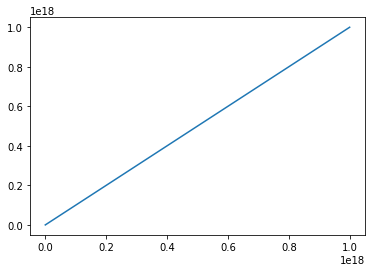

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x = np.linspace(0,10**18,100)
# plt.plot(x, np.power(2, x/1.5))
# plt.plot(x, 2**(x/1.5))
plt.plot(x, x+3.0/(2**(x/1.5)))

a = optimize.brent(lambda x: x+3.0/(2**(x/1.5)))

In [21]:
a

0.7068504108942372